In [1]:
] activate ../Acceleration

 Activating environment at `~/Desktop/Code/Acceleration/Acceleration/Project.toml`


In [12]:
using Acceleration

data, labels = load_dataset("MNIST",[0,1],1000,35)
f,∇f,∇ϕ_cjg,σ,L,μ  = linear_regression(data,labels);

In [13]:
n = size(data,2)
x_ini = zeros(n)
k = 10000;

@time x_out1 = mirror_descent(f,∇f,∇ϕ_cjg,x_ini,σ,L,k);
@time x_out2 = gradient_descent(f,∇f,∇ϕ_cjg,x_ini,σ,L,k);
@time x_out3 = accelerated_mirror_descent(f,∇f,∇ϕ_cjg,x_ini,σ,L,k);
#@time x_out4 = SCVX_AMD(f,∇f,∇ϕ_cjg,x_ini,σ,L,μ,k);

  0.243871 seconds (120.97 k allocations: 127.523 MiB, 5.80% gc time)
  0.232027 seconds (115.83 k allocations: 127.289 MiB, 7.36% gc time)
  0.246513 seconds (157.63 k allocations: 138.464 MiB, 5.95% gc time)


In [14]:
using JuMP
using Ipopt

@time model = Model(with_optimizer(Ipopt.Optimizer))
@time set_silent(model)
@time @variable(model, x[1:n])
@time @objective(model, Min, f(x))
@time optimize!(model)
@time x_opt = value.(x);

  0.031626 seconds (22.66 k allocations: 1.215 MiB)
  0.000003 seconds
  0.026384 seconds (63.78 k allocations: 3.300 MiB)
  0.191071 seconds (380.21 k allocations: 50.814 MiB)
  7.733747 seconds (53.30 M allocations: 3.327 GiB, 6.38% gc time)
  0.024485 seconds (97.28 k allocations: 4.979 MiB)


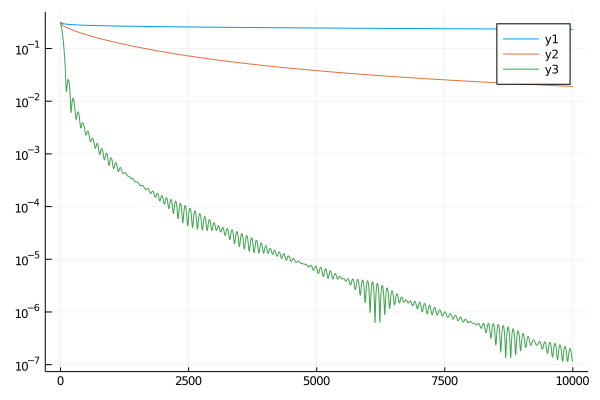

In [15]:
using Plots
using LinearAlgebra

p1 = sqrt.(sum((x_out1 .- x_opt).^2, dims=1)');
p2 = sqrt.(sum((x_out2 .- x_opt).^2, dims=1)');
p3 = sqrt.(sum((x_out3 .- x_opt).^2, dims=1)');
#p4 = sqrt.(sum((x_out4 .- x_opt).^2, dims=1)');


plot(hcat(p1,p2,p3),yaxis=:log)

In [ ]:
μ

In [ ]:
L